In [155]:
import tensorflow as tf
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import random

In [194]:
# init pandas.data
df = pd.DataFrame()
df['a'] = pd.Series(range(10))
df['y'] = 5 * df['a'] + 20 + random.random()*0
my_feature = df[['a']]
targets = df['y']

In [195]:
# init linearRegressor
feature_columns = tf.feature_column.numeric_column('a')
print(feature_columns)
linear_regressor = tf.estimator.LinearRegressor(feature_columns=[tf.feature_column.numeric_column('a')])

_NumericColumn(key='a', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpto7xlons', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f45e3bfcfd0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [179]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating
    ds = tf.data.Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [198]:
linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100000
)
weights = linear_regressor.get_variable_value('linear/linear_model/a/weights')[0][0]
bias_weights = linear_regressor.get_variable_value('linear/linear_model/bias_weights')[0]
print("y = {}*x + {}".format(weights,bias_weights))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpto7xlons/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmpto7xlons/model.ckpt.
INFO:tensorflow:loss = 30.572449, step = 1001
INFO:tensorflow:global_step/sec: 1126.89
INFO:tensorflow:loss = 4.9346066, step = 1101 (0.091 sec)
INFO:tensorflow:global_step/sec: 1264.12
INFO:tensorflow:loss = 32.24516, step = 1201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1257.04
INFO:tensorflow:loss = 1.0229343, step = 1301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1405.42
INFO:tensorflow:loss = 0.23979893, step = 1401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1274.97
INFO:tensorflow:loss = 84.21015, step = 1501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1451.65
INFO:tensorflow:loss = 19.18872, step = 1601 (0.069 sec)
INFO:tensorflow:global_step/sec: 1485.41
INFO:tensorflow:loss = 0.46933663, step = 1701 (0.067 sec)
INFO:tensorflow:global_step/sec: 1116.88
INFO:tensorflow:loss = 3

INFO:tensorflow:global_step/sec: 1207.77
INFO:tensorflow:loss = 7.1527843, step = 9201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1187.76
INFO:tensorflow:loss = 3.802488, step = 9301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1563.84
INFO:tensorflow:loss = 6.8460765, step = 9401 (0.064 sec)
INFO:tensorflow:global_step/sec: 1490.21
INFO:tensorflow:loss = 21.21969, step = 9501 (0.067 sec)
INFO:tensorflow:global_step/sec: 1492.35
INFO:tensorflow:loss = 7.739299, step = 9601 (0.067 sec)
INFO:tensorflow:global_step/sec: 1515.17
INFO:tensorflow:loss = 2.8090355, step = 9701 (0.066 sec)
INFO:tensorflow:global_step/sec: 1215.92
INFO:tensorflow:loss = 0.8918712, step = 9801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1169.02
INFO:tensorflow:loss = 3.265329, step = 9901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1375.89
INFO:tensorflow:loss = 0.9371245, step = 10001 (0.073 sec)
INFO:tensorflow:global_step/sec: 1238.52
INFO:tensorflow:loss = 28.071838, step = 10101 (0.081 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 1348.32
INFO:tensorflow:loss = 0.28262392, step = 17401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1303.94
INFO:tensorflow:loss = 6.6071143, step = 17501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1139.18
INFO:tensorflow:loss = 0.8364729, step = 17601 (0.088 sec)
INFO:tensorflow:global_step/sec: 1150.85
INFO:tensorflow:loss = 1.0911763, step = 17701 (0.087 sec)
INFO:tensorflow:global_step/sec: 1589.85
INFO:tensorflow:loss = 0.87683326, step = 17801 (0.063 sec)
INFO:tensorflow:global_step/sec: 1340.08
INFO:tensorflow:loss = 0.0015912352, step = 17901 (0.075 sec)
INFO:tensorflow:global_step/sec: 1243.84
INFO:tensorflow:loss = 4.033655, step = 18001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1168.62
INFO:tensorflow:loss = 1.0087854, step = 18101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1353.97
INFO:tensorflow:loss = 6.0014477, step = 18201 (0.074 sec)
INFO:tensorflow:global_step/sec: 1534.21
INFO:tensorflow:loss = 0.8061004, step = 18301 (0.065 s

INFO:tensorflow:global_step/sec: 1669.04
INFO:tensorflow:loss = 2.0517364, step = 25601 (0.060 sec)
INFO:tensorflow:global_step/sec: 1312.28
INFO:tensorflow:loss = 0.31915447, step = 25701 (0.076 sec)
INFO:tensorflow:global_step/sec: 1284.39
INFO:tensorflow:loss = 1.3022658, step = 25801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1221.15
INFO:tensorflow:loss = 1.2796066, step = 25901 (0.082 sec)
INFO:tensorflow:global_step/sec: 1488.4
INFO:tensorflow:loss = 0.32503012, step = 26001 (0.067 sec)
INFO:tensorflow:global_step/sec: 1347.28
INFO:tensorflow:loss = 2.7640471, step = 26101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1503.61
INFO:tensorflow:loss = 0.06276158, step = 26201 (0.067 sec)
INFO:tensorflow:global_step/sec: 1400.32
INFO:tensorflow:loss = 2.696697, step = 26301 (0.071 sec)
INFO:tensorflow:global_step/sec: 1382.91
INFO:tensorflow:loss = 2.6566734, step = 26401 (0.072 sec)
INFO:tensorflow:global_step/sec: 1495.35
INFO:tensorflow:loss = 0.25303805, step = 26501 (0.067 sec

INFO:tensorflow:loss = 0.09324871, step = 33701 (0.071 sec)
INFO:tensorflow:global_step/sec: 1389.16
INFO:tensorflow:loss = 0.028715499, step = 33801 (0.072 sec)
INFO:tensorflow:global_step/sec: 1652.28
INFO:tensorflow:loss = 0.2314885, step = 33901 (0.060 sec)
INFO:tensorflow:global_step/sec: 1478.58
INFO:tensorflow:loss = 8.749054e-05, step = 34001 (0.068 sec)
INFO:tensorflow:global_step/sec: 1406.42
INFO:tensorflow:loss = 0.2118168, step = 34101 (0.071 sec)
INFO:tensorflow:global_step/sec: 1326.14
INFO:tensorflow:loss = 0.86742836, step = 34201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1466.09
INFO:tensorflow:loss = 0.21655521, step = 34301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1407.01
INFO:tensorflow:loss = 0.09275081, step = 34401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1338.33
INFO:tensorflow:loss = 0.02425102, step = 34501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1294.07
INFO:tensorflow:loss = 0.8173631, step = 34601 (0.077 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.068349026, step = 41801 (0.060 sec)
INFO:tensorflow:global_step/sec: 1400.47
INFO:tensorflow:loss = 0.06820947, step = 41901 (0.072 sec)
INFO:tensorflow:global_step/sec: 1554.65
INFO:tensorflow:loss = 0.06997824, step = 42001 (0.064 sec)
INFO:tensorflow:global_step/sec: 1588.31
INFO:tensorflow:loss = 0.18835436, step = 42101 (0.063 sec)
INFO:tensorflow:global_step/sec: 1454.08
INFO:tensorflow:loss = 0.26708215, step = 42201 (0.069 sec)
INFO:tensorflow:global_step/sec: 1446.91
INFO:tensorflow:loss = 0.0085376855, step = 42301 (0.069 sec)
INFO:tensorflow:global_step/sec: 1598.95
INFO:tensorflow:loss = 0.11341857, step = 42401 (0.063 sec)
INFO:tensorflow:global_step/sec: 1519.98
INFO:tensorflow:loss = 0.06608625, step = 42501 (0.066 sec)
INFO:tensorflow:global_step/sec: 1388.38
INFO:tensorflow:loss = 0.06471658, step = 42601 (0.071 sec)
INFO:tensorflow:global_step/sec: 1234.84
INFO:tensorflow:loss = 0.2509928, step = 42701 (0.082 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 5.3087715e-06, step = 49901 (0.073 sec)
INFO:tensorflow:global_step/sec: 1257.87
INFO:tensorflow:loss = 0.02124808, step = 50001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1366.82
INFO:tensorflow:loss = 0.002479747, step = 50101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1228.81
INFO:tensorflow:loss = 0.03890921, step = 50201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1467.87
INFO:tensorflow:loss = 0.009582993, step = 50301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1291.6
INFO:tensorflow:loss = 0.08460908, step = 50401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1340.05
INFO:tensorflow:loss = 0.002147483, step = 50501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1390.62
INFO:tensorflow:loss = 0.0022209324, step = 50601 (0.072 sec)
INFO:tensorflow:global_step/sec: 1388.9
INFO:tensorflow:loss = 0.01990004, step = 50701 (0.072 sec)
INFO:tensorflow:global_step/sec: 1172.03
INFO:tensorflow:loss = 0.035637103, step = 50801 (0.085 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 1540.57
INFO:tensorflow:loss = 0.01994096, step = 58001 (0.065 sec)
INFO:tensorflow:global_step/sec: 1497.45
INFO:tensorflow:loss = 0.019708928, step = 58101 (0.067 sec)
INFO:tensorflow:global_step/sec: 1339.09
INFO:tensorflow:loss = 5.879119e-07, step = 58201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1492.93
INFO:tensorflow:loss = 0.006932158, step = 58301 (0.067 sec)
INFO:tensorflow:global_step/sec: 1562.61
INFO:tensorflow:loss = 0.0033091987, step = 58401 (0.064 sec)
INFO:tensorflow:global_step/sec: 1488.73
INFO:tensorflow:loss = 0.018507848, step = 58501 (0.067 sec)
INFO:tensorflow:global_step/sec: 1440.5
INFO:tensorflow:loss = 0.01165366, step = 58601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1487.68
INFO:tensorflow:loss = 0.011568162, step = 58701 (0.066 sec)
INFO:tensorflow:global_step/sec: 1244
INFO:tensorflow:loss = 0.00066145096, step = 58801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1388.94
INFO:tensorflow:loss = 0.0063759014, step =

INFO:tensorflow:loss = 0.0023043985, step = 66001 (0.059 sec)
INFO:tensorflow:global_step/sec: 1591.08
INFO:tensorflow:loss = 0.00017673628, step = 66101 (0.063 sec)
INFO:tensorflow:global_step/sec: 1330.22
INFO:tensorflow:loss = 0.0041022445, step = 66201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1478.62
INFO:tensorflow:loss = 0.001100928, step = 66301 (0.067 sec)
INFO:tensorflow:global_step/sec: 1445.08
INFO:tensorflow:loss = 0.0062112752, step = 66401 (0.069 sec)
INFO:tensorflow:global_step/sec: 1494.01
INFO:tensorflow:loss = 0.0017691152, step = 66501 (0.067 sec)
INFO:tensorflow:global_step/sec: 1422.24
INFO:tensorflow:loss = 0.003998098, step = 66601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1448.32
INFO:tensorflow:loss = 0.0016387573, step = 66701 (0.069 sec)
INFO:tensorflow:global_step/sec: 1515.86
INFO:tensorflow:loss = 0.0038227774, step = 66801 (0.066 sec)
INFO:tensorflow:global_step/sec: 1318.08
INFO:tensorflow:loss = 0.002156685, step = 66901 (0.076 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 1295.77
INFO:tensorflow:loss = 2.046363e-06, step = 74001 (0.078 sec)
INFO:tensorflow:global_step/sec: 1368.12
INFO:tensorflow:loss = 0.0006567501, step = 74101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1199.34
INFO:tensorflow:loss = 0.002045141, step = 74201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1536.79
INFO:tensorflow:loss = 0.002009929, step = 74301 (0.065 sec)
INFO:tensorflow:global_step/sec: 1538.97
INFO:tensorflow:loss = 0.00034243858, step = 74401 (0.065 sec)
INFO:tensorflow:global_step/sec: 1217.24
INFO:tensorflow:loss = 0.001278295, step = 74501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1285.22
INFO:tensorflow:loss = 0.00010358379, step = 74601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1360.79
INFO:tensorflow:loss = 0.0012401228, step = 74701 (0.073 sec)
INFO:tensorflow:global_step/sec: 1395.38
INFO:tensorflow:loss = 0.00060614716, step = 74801 (0.072 sec)
INFO:tensorflow:global_step/sec: 1245.32
INFO:tensorflow:loss = 0.0006726

INFO:tensorflow:loss = 2.4103341e-05, step = 81901 (0.076 sec)
INFO:tensorflow:global_step/sec: 1321.51
INFO:tensorflow:loss = 0.00043238688, step = 82001 (0.076 sec)
INFO:tensorflow:global_step/sec: 906.706
INFO:tensorflow:loss = 0.00020792359, step = 82101 (0.111 sec)
INFO:tensorflow:global_step/sec: 1298.4
INFO:tensorflow:loss = 8.5221836e-07, step = 82201 (0.077 sec)
INFO:tensorflow:global_step/sec: 1209.78
INFO:tensorflow:loss = 0.0006628252, step = 82301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1402.32
INFO:tensorflow:loss = 0.0009258591, step = 82401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1457.03
INFO:tensorflow:loss = 1.6722828e-05, step = 82501 (0.068 sec)
INFO:tensorflow:global_step/sec: 1437.44
INFO:tensorflow:loss = 0.0006295669, step = 82601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1717.89
INFO:tensorflow:loss = 0.00040047622, step = 82701 (0.058 sec)
INFO:tensorflow:global_step/sec: 1705.02
INFO:tensorflow:loss = 3.118906e-05, step = 82801 (0.059 sec)
INFO:t

INFO:tensorflow:global_step/sec: 1169.36
INFO:tensorflow:loss = 0.00031593576, step = 89901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1122.06
INFO:tensorflow:loss = 0.00014138188, step = 90001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1579.49
INFO:tensorflow:loss = 6.689131e-05, step = 90101 (0.063 sec)
INFO:tensorflow:global_step/sec: 1281.16
INFO:tensorflow:loss = 0.00030305138, step = 90201 (0.078 sec)
INFO:tensorflow:global_step/sec: 847.743
INFO:tensorflow:loss = 1.0938515e-05, step = 90301 (0.118 sec)
INFO:tensorflow:global_step/sec: 1369.11
INFO:tensorflow:loss = 2.6520866e-05, step = 90401 (0.073 sec)
INFO:tensorflow:global_step/sec: 1461.05
INFO:tensorflow:loss = 0.00020452718, step = 90501 (0.068 sec)
INFO:tensorflow:global_step/sec: 1557.34
INFO:tensorflow:loss = 6.852351e-05, step = 90601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1502.22
INFO:tensorflow:loss = 6.808201e-06, step = 90701 (0.066 sec)
INFO:tensorflow:global_step/sec: 1426.33
INFO:tensorflow:loss = 6.1

INFO:tensorflow:global_step/sec: 1514.47
INFO:tensorflow:loss = 4.7594545e-05, step = 97801 (0.066 sec)
INFO:tensorflow:global_step/sec: 1465.04
INFO:tensorflow:loss = 9.313226e-08, step = 97901 (0.068 sec)
INFO:tensorflow:global_step/sec: 1431.17
INFO:tensorflow:loss = 9.383206e-06, step = 98001 (0.070 sec)
INFO:tensorflow:global_step/sec: 1441.8
INFO:tensorflow:loss = 6.985619e-05, step = 98101 (0.069 sec)
INFO:tensorflow:global_step/sec: 1512.38
INFO:tensorflow:loss = 4.4616187e-05, step = 98201 (0.066 sec)
INFO:tensorflow:global_step/sec: 1398.4
INFO:tensorflow:loss = 9.7201555e-05, step = 98301 (0.072 sec)
INFO:tensorflow:global_step/sec: 1077.02
INFO:tensorflow:loss = 1.114131e-05, step = 98401 (0.095 sec)
INFO:tensorflow:global_step/sec: 1258.28
INFO:tensorflow:loss = 1.0812713e-05, step = 98501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1128.21
INFO:tensorflow:loss = 9.97656e-06, step = 98601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1192.95
INFO:tensorflow:loss = 2.328306

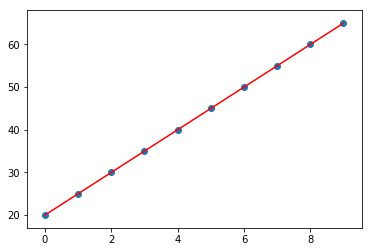

In [200]:
plt.plot(df['a'],weights*df['a']+bias_weights,color='r')
plt.scatter(df['a'], targets)
plt.show()